# Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Importing the Dataset

In [9]:
dataset = pd.read_csv("Diwali Sales Data.csv", encoding="unicode_escape")

In [11]:
dataset.shape

(11251, 15)

In [13]:
dataset.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [18]:
dataset.drop(["Status", "unnamed1"], axis=1, inplace=True)

In [24]:
dataset.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [28]:
dataset.dropna(inplace=True)

In [32]:
dataset["Amount"] = dataset["Amount"].astype("int")

In [36]:
dataset.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [39]:
dataset.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender

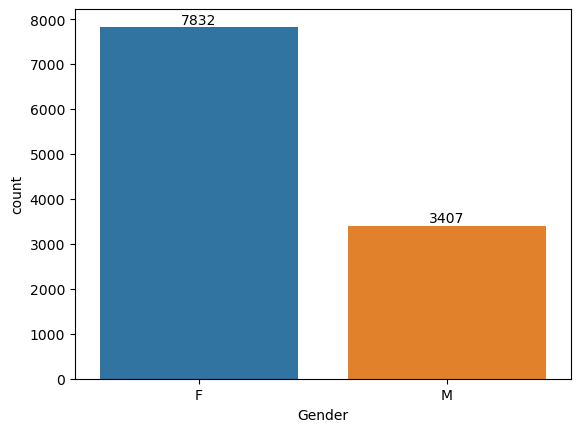

In [41]:
# Plotting a Bar Chart for Gender and it's count
ax = sns.countplot(x="Gender", data=dataset)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

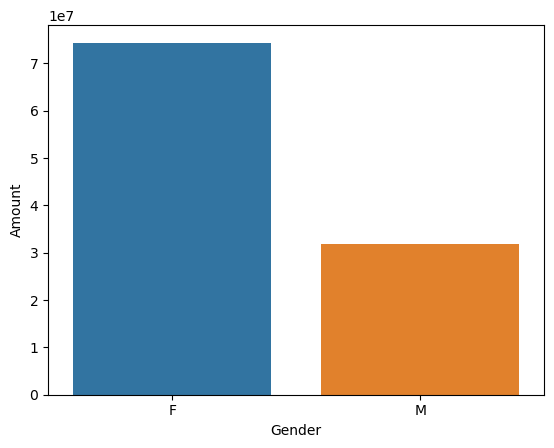

In [47]:
# Plotting a bar for Gender vs Total Amount

sales_gen = dataset.groupby(["Gender"], as_index=False)["Amount"].sum().sort_values("Amount", ascending=False)

sns.barplot(x = "Gender", y = "Amount", data=sales_gen)

From the above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

## Age

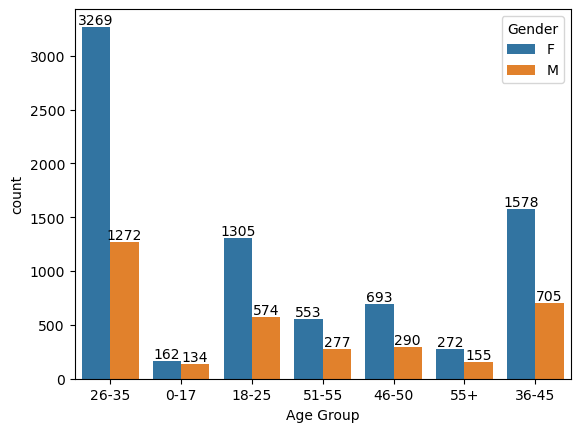

In [52]:
ax = sns.countplot(data=dataset, x="Age Group", hue="Gender")

for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Age Group', ylabel='Amount'>

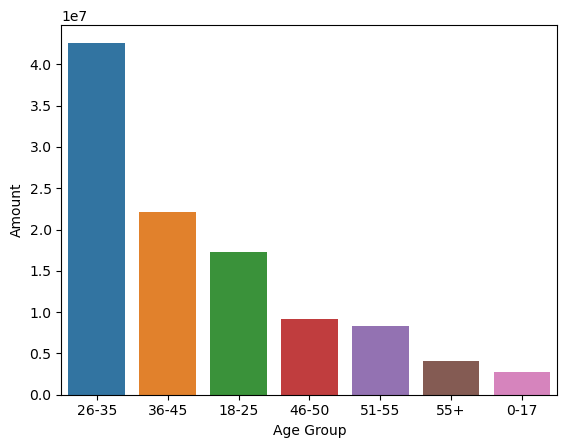

In [55]:
# Total Amount vs Age Group

sales_age = dataset.groupby(["Age Group"], as_index=False)["Amount"].sum().sort_values("Amount", ascending=False)

sns.barplot(x = "Age Group", y = "Amount", data=sales_age)

From above graphs we can see that most of the buyers are of the age group between 26-35 yo Female

## State

<Axes: xlabel='State', ylabel='Orders'>

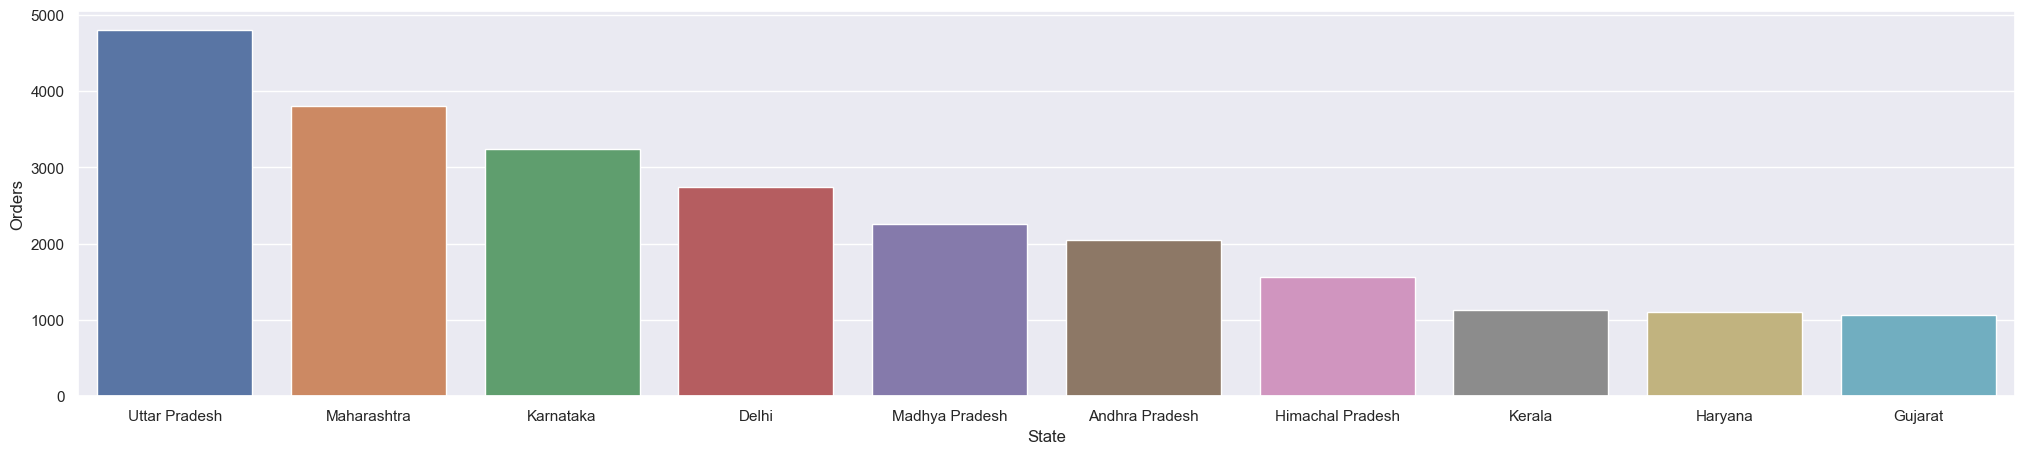

In [115]:
# Total Number of order from top 10 states

sales_state = dataset.groupby(["State"], as_index=False)["Orders"].sum().sort_values("Orders", ascending=False).head(10)

sns.set(rc={"figure.figsize": (25,5)})
sns.barplot(data=sales_state, x="State", y="Orders")

<Axes: xlabel='State', ylabel='Amount'>

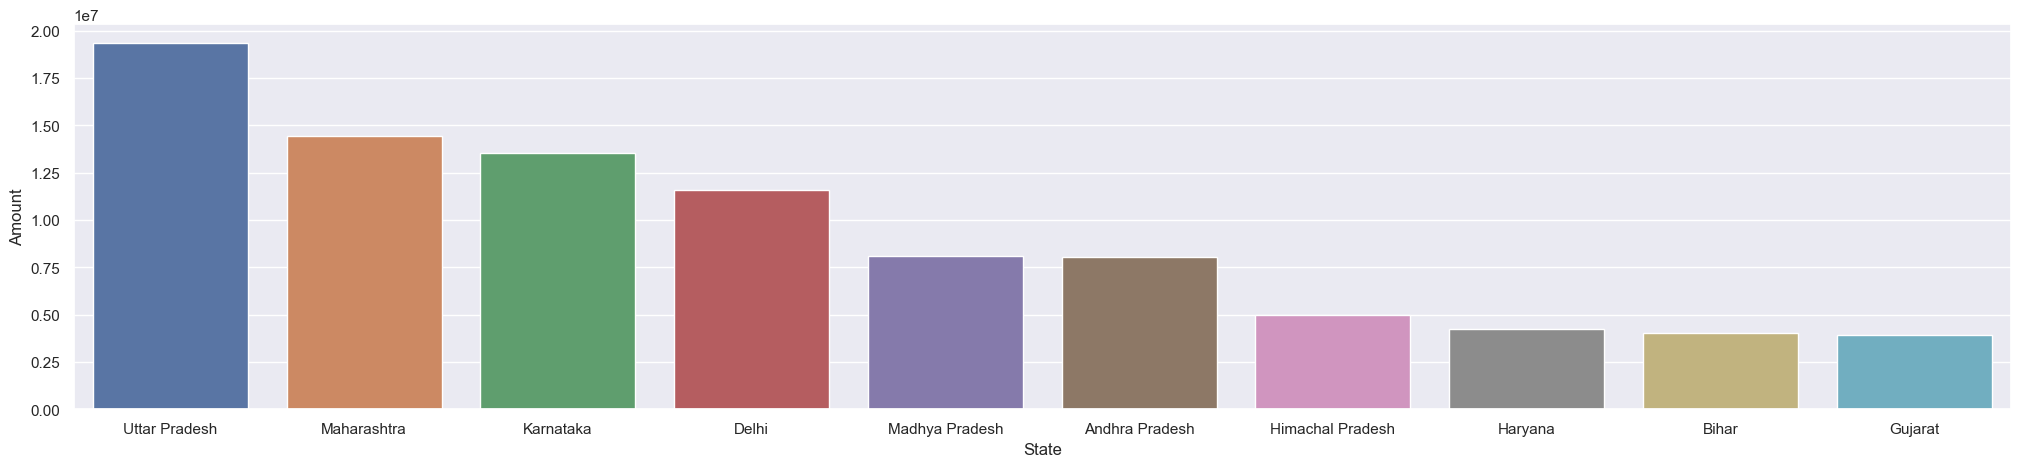

In [116]:
# Total Amount/Sales from Top 10 States

sales_state = dataset.groupby(["State"], as_index=False)["Amount"].sum().sort_values("Amount", ascending=False).head(10)

sns.set(rc={"figure.figsize": (25,5)})
sns.barplot(data=sales_state, x="State", y="Amount")

From above graphs we can see that most of the orders and total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka Respectively

## Marital Status

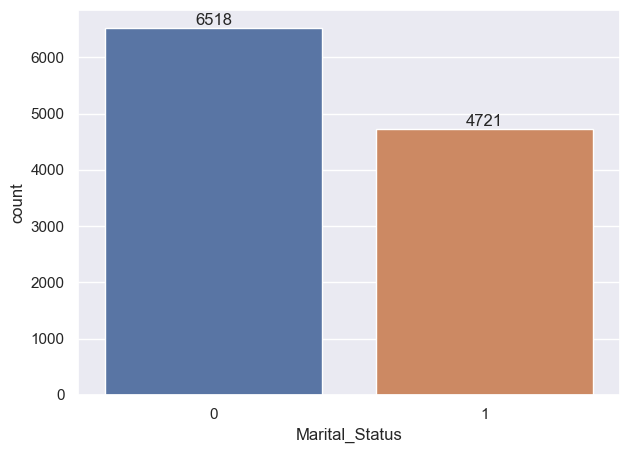

In [79]:
ax = sns.countplot(data=dataset, x="Marital_Status")

sns.set(rc={'figure.figsize':(8,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

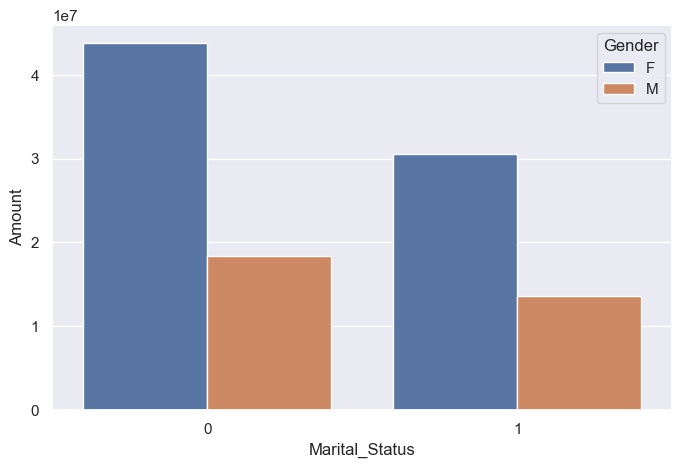

In [84]:
sales_marital = dataset.groupby(["Marital_Status", "Gender"], as_index=False)["Amount"].sum().sort_values("Amount", ascending=False)

sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(x = "Marital_Status", y = "Amount", hue="Gender", data=sales_marital)

From the above graphs we can see that most of the buyers are married(Female) and they have high purchasing Power

## Occupation

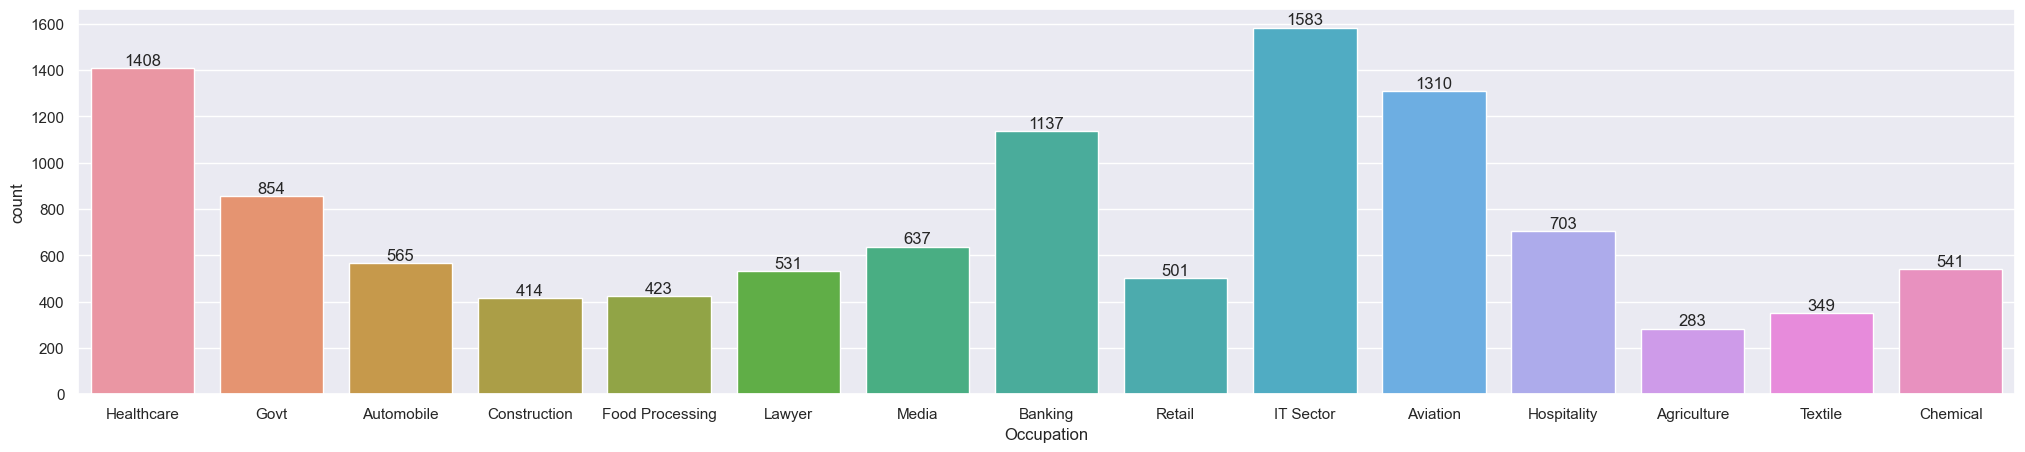

In [86]:
ax = sns.countplot(data=dataset, x="Occupation")

sns.set(rc={'figure.figsize':(25,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

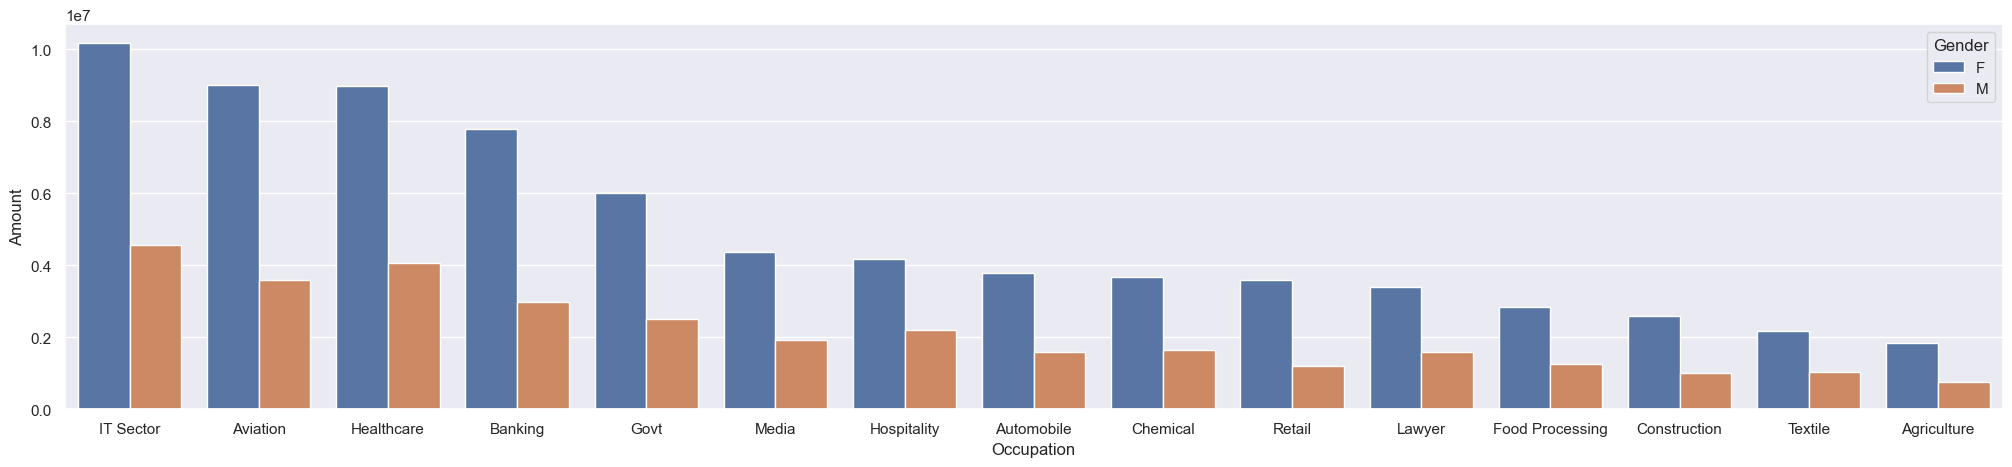

In [92]:
sales_occupation = dataset.groupby(["Occupation", "Gender"], as_index=False)["Amount"].sum().sort_values("Amount", ascending=False)

sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x = "Occupation", y = "Amount", hue="Gender" ,data=sales_occupation)

From the above graphs we can see that most of the buyers which are Female are working in IT, Aviatio, Healthcare and Banking Sector

## Product Category

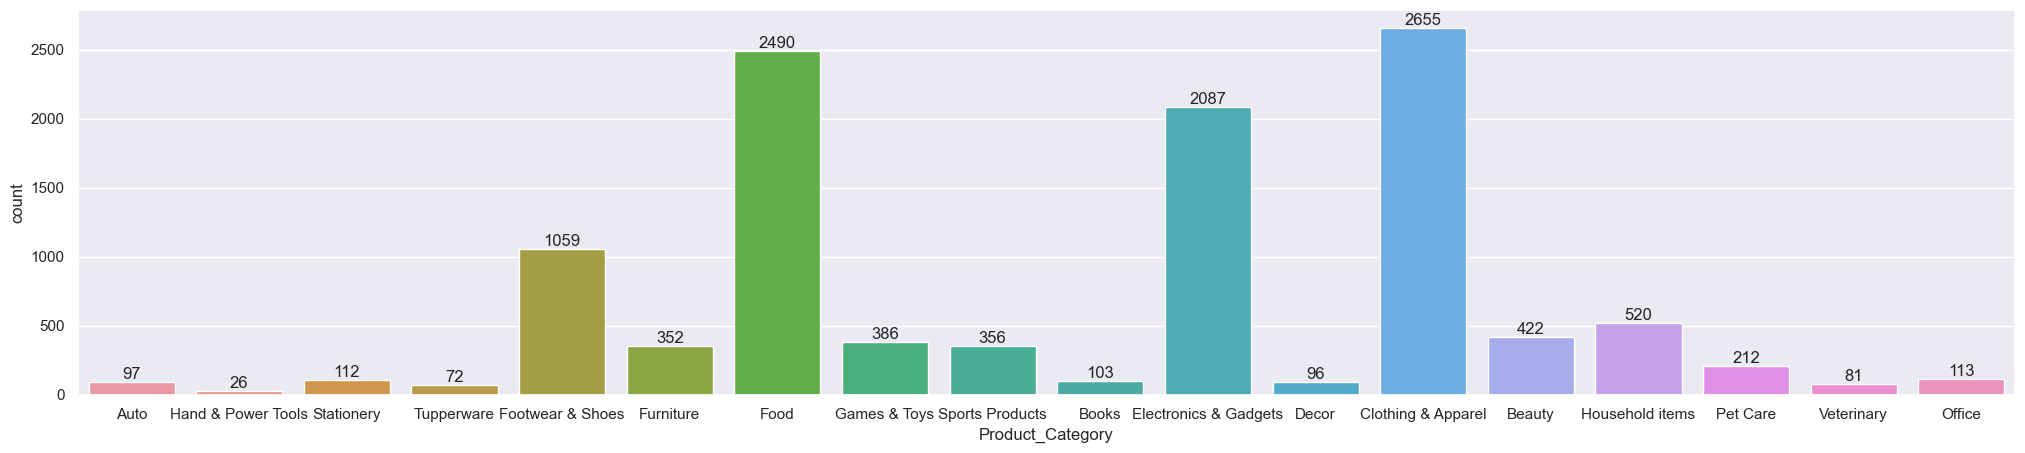

In [93]:
ax = sns.countplot(data=dataset, x="Product_Category")

sns.set(rc={'figure.figsize':(25,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

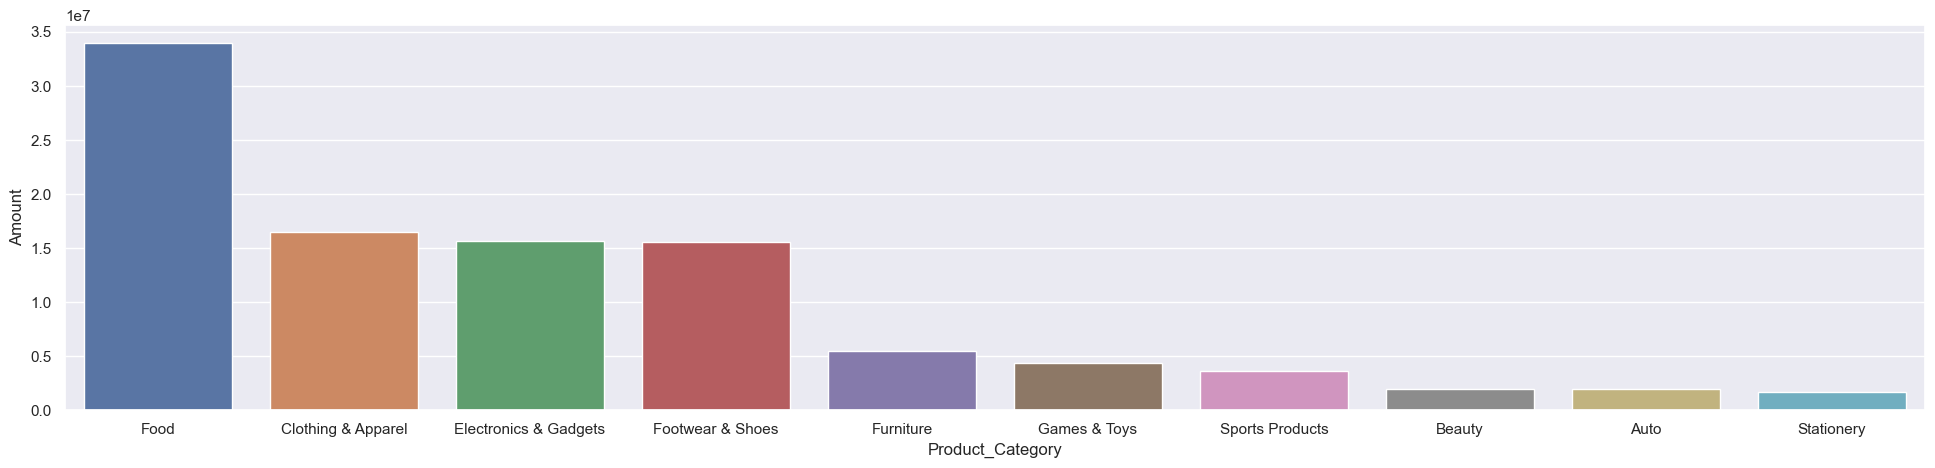

In [118]:
sales_product = dataset.groupby(["Product_Category"], as_index=False)["Amount"].sum().sort_values("Amount", ascending=False).head(10)

sns.set(rc={'figure.figsize':(24,5)})
sns.barplot(x = "Product_Category", y = "Amount", data=sales_product)

From the above graphs, we can see that most of the sold products are from Food, Clothing and Electronics Category

## Product ID

<Axes: xlabel='Product_ID', ylabel='Orders'>

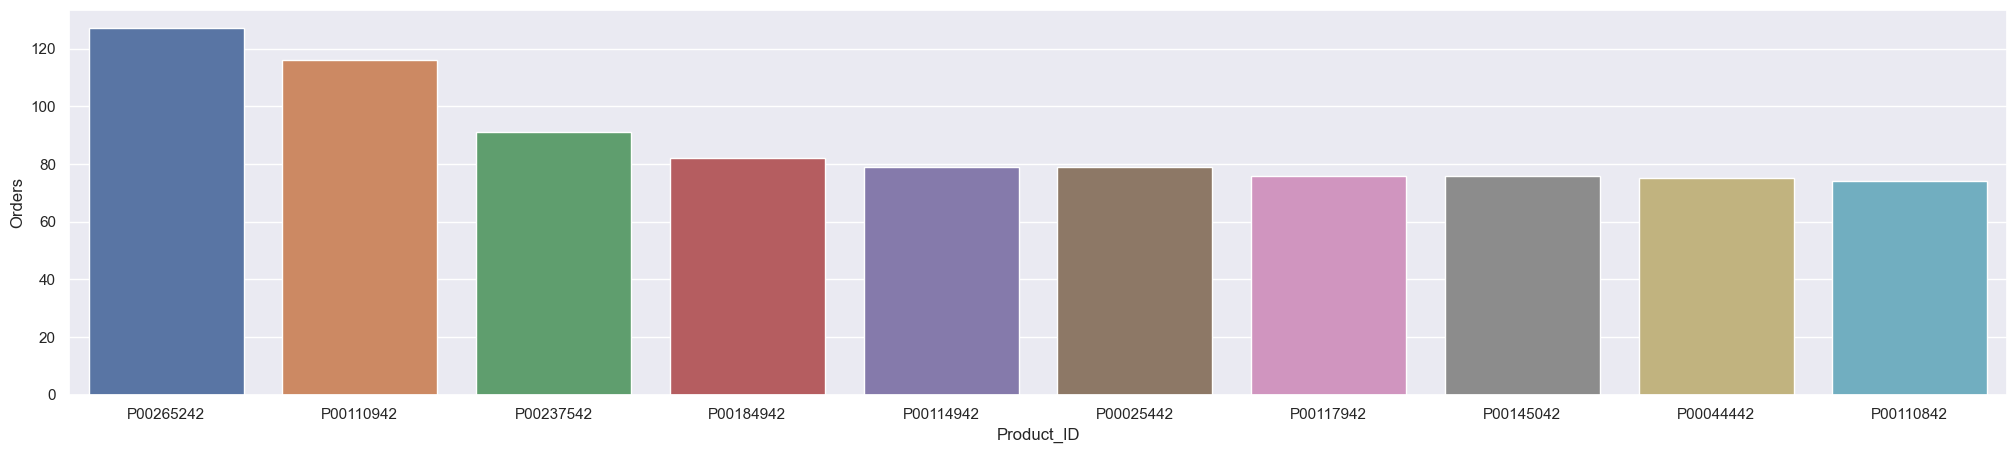

In [114]:
sales_id = dataset.groupby(["Product_ID"], as_index=False)["Orders"].sum().sort_values("Orders", ascending=False).head(10)

sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x = "Product_ID", y = "Orders", data=sales_id)

## Conclusion

Married Women age group 26-35 yrs from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics Category